<a href="https://colab.research.google.com/github/Tefong35/Projet_DS_TrafficAccident/blob/main/Projet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Accident Routiers en France
**Objectif: Prédire la gravité des accidents routiers en France.**


In [1]:
# Importer le jeu données
import pandas as pd
import numpy as np
dataset = pd.read_csv("/content/drive/MyDrive/Projet_DataScientest/001_df_processed_nogps.csv", low_memory=False) #, na_values=["-1"]
dataset.head()

KeyboardInterrupt: ignored

In [1]:
#dataset.info()

In [2]:
# Analyser les cas de données manquantes dans le DataFrame
#dataset.isna().sum(axis = 0)*100/len(dataset)

# Classification Multiclasse/Binaire - Analyse Factorielle

>



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
!pip install factor_analyzer

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [6]:
dataset_new = dataset.copy()

In [7]:
dataset_new['grav'] = dataset_new['grav'].replace({1:"0",2:"3",3:"2",4:"1"}).astype(int)
dataset_new = dataset_new.sort_values(by='grav')
y = dataset_new['grav']
y_multiclass = np.array(y).ravel()
y_b =y.replace({0:'0',1:'0',2:'1',3:'1'}).astype(int)
y_binaire = np.array(y_b).ravel()
#target=target.apply(lambda x: 1 if (x==2 or x==3) else 0)
drop_var = ['grav','num_veh','date','Num_Acc', "age", "lum", "agg"]
X = dataset_new.drop(drop_var, axis=1)

Sampling Adequacy - Kaiser-Meyer-Olkin (KMO) **test**

In [8]:
#Sampling Adequacy - Kaiser-Meyer-Olkin (KMO) test

#Le test KMO mesure l’adéquation des données à l’analyse factorielle.
#Il détermine l'adéquation pour chaque variable observée et pour le modèle complet.
#KMO estime la proportion de variance entre toutes les variables observées. Une proportion plus faible convient mieux à l’analyse factorielle.
#Les valeurs de KMO varient entre 0 et 1. Une valeur de KMO inférieure à 0,6 est considérée comme insuffisante.


kmo_all, kmo_model = calculate_kmo(X)

print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature:\n{}".format(kmo_all.round(3)))

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Overall KMO = 0.392
KMO per feature:
[0.953 0.939 0.806 0.573 0.076 0.064 0.064 0.242 0.482 0.499 0.396 0.877
 0.582 0.581 0.334 0.216 0.332 0.333 0.57  0.537 0.601 0.428 0.177 0.052
 0.108 0.143 0.12  0.571 0.435 0.712 0.459 0.531 0.707 0.799 0.203 0.198
 0.076 0.064 0.161 0.153 0.184 0.564 0.59  0.411 0.351 0.296 0.437 0.842
 0.556 0.697 0.633 0.448 0.506 0.745 0.689 0.464 0.126 0.08  0.416 0.205
 0.186 0.112 0.136 0.131 0.407 0.544 0.572 0.279 0.395 0.342 0.363 0.391
 0.635 0.406 0.329 0.346 0.077 0.596 0.601 0.452 0.636 0.647 0.373 0.371
 0.616 0.79 ]


In [12]:
X.shape

(2509660, 86)

In [9]:
#chi_square_value, p_value = calculate_bartlett_sphericity(X)
#chi_square_value, p_value
# Variables considered adequate by the KMO test
kmo_passed = list(X.columns[kmo_all >= 0.5])
kmo_passed

['Casque',
 'Ceinture',
 'Dispositif_Enfant',
 'Equipement_Réfléchissant',
 'catu_Pieton',
 'sexe_Feminin',
 'sexe_Masculin',
 'trajet_Utilisation_Professionnelle',
 'locp_Chausse_Hors_Passage_Pieton',
 'locp_Sur_Passage_Pieton',
 'actp_Traversant',
 'etatp_Seul',
 'senc_Repere_Decroissant',
 'prof_Pente',
 'plan_Courbe',
 'situ_Chausse',
 'situ_Trottoir/Bord_de_route',
 'infra_Autre',
 'infra_Carrefour',
 'vosp_Cycl/Reserv',
 'col_2_Vehicules',
 'obs_Fixe',
 'obs_Piéton',
 'obs_Vehicule',
 'int_TouY',
 'int_X',
 'region_Auvergne-Rhône-Alpes',
 'region_Grand Est',
 'region_Hauts-de-France',
 'region_Nouvelle-Aquitaine',
 'region_Occitanie',
 "region_Provence-Alpes-Côte d'Azur",
 'region_Île-de-France']

In [10]:
# Variables considered inadequate by the KMO test
kmo_failed = list(X.columns[kmo_all < 0.5])
kmo_failed

['place_Arriere_Droit',
 'place_Arriere_Gauche',
 'place_Autre',
 'place_Avant_Droit',
 'place_Avant_Gauche',
 'catu_Conducteur',
 'catu_Passager',
 'trajet_Achats',
 'trajet_Autre',
 'trajet_Domicile_Travail',
 'trajet_Loisirs',
 'locp_Trottoir/Bord_de_route',
 'actp_Autre',
 'actp_Avec_Animal',
 'actp_Deplacement_sens_inv_vehicule',
 'actp_Deplacement_sens_vehicule',
 'actp_Jouant_Courant',
 'etatp_Groupe',
 'senc_Repere_Croissant',
 'manv_Arret/se_gare',
 'manv_Aucune_Manoeuvre',
 'manv_Autre',
 'manv_Contresens',
 'manv_Depasse',
 'manv_Deport',
 'manv_Tourne',
 'circ_Bidirectionnelle',
 'circ_Chausse_Separee',
 'circ_Sens_Unique',
 'surf_Glissant',
 'col_3_Vehicules',
 'catv_2_roues',
 'catv_Lourd',
 'catv_Utilitaire',
 'catv_Voiture',
 'choc_Arriere',
 'choc_Avant',
 'choc_Droit',
 'choc_Gauche',
 'choc_Tonneaux',
 'int_Autre',
 'atm_Eleve',
 'atm_Faible',
 'catr_Departementale',
 'catr_Nationnale/Autoroute',
 'catr_Voix_Communale',
 'region_Bourgogne-Franche-Comté',
 'region_Bre

In [9]:
print(len(kmo_passed))
print(len(kmo_failed))


33
53


In [11]:
# Preuve pour confirmer que les variables choisis sont adequate pour l,analyse factoriel
kmo_passed = list(X.columns[kmo_all >= 0.5])
X_kmo = X[kmo_passed]

kmo_all, kmo_model = calculate_kmo(X_kmo)

print("Overall KMO = {:.3f}".format(kmo_model))
print("KMO per feature:\n{}".format(kmo_all.round(3)))

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Overall KMO = 0.626
KMO per feature:
[0.509 0.61  0.222 0.394 0.832 0.527 0.527 0.85  0.573 0.622 0.841 0.927
 0.593 0.62  0.712 0.58  0.591 0.62  0.58  0.561 0.87  0.518 0.768 0.678
 0.485 0.561 0.148 0.136 0.14  0.147 0.147 0.147 0.252]


In [12]:
#Copier les variable choisit
X = X_kmo.copy()

In [13]:
#Fonction pour entrainer le model
def train_factor_model(dataset, number_of_factors, rotation="varimax"):
  factor_model = FactorAnalyzer(n_factors=number_of_factors, rotation=rotation)
  factor_model.fit(dataset)

  return factor_model

In [14]:
# Fonction pour representer les facteurs
def scree_plot(eigenvalues, n_columns):
  plt.style.use("fivethirtyeight")
  # Create scree plot using matplotlib
  fig, ax = plt.subplots(figsize=(10, 6))

  ax.scatter(range(1, n_columns + 1), eigenvalues, s=50)
  ax.plot(range(1, n_columns + 1), eigenvalues)

  ax.set_title('Scree Plot')
  ax.set_xlabel('# Factors')
  ax.set_ylabel('Eigenvalues')

  ax.grid(False)

  ax.axhline(y=1, linestyle="--", color="grey", linewidth=1)
  # plt.savefig("scree_plot.png", transparent=True, dpi=600)
  plt.show()

In [15]:
def loadings_plot(loadings, variables):
  # Create loadings plot using matplotlib
  fig, ax = plt.subplots(figsize=(15, 5))

  image = ax.matshow(loadings, cmap="hot")

  n_factors = loadings.shape[1]
  factors = ["Factor{}".format(index) for index in range(n_factors)]

  ax.set_yticklabels([""] + variables, fontsize=10)
  ax.set_xticklabels([""] + factors, rotation="vertical", fontsize=10)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.grid(False)

  plt.colorbar(image)
  plt.tight_layout()
  plt.show()

In [16]:
factor_model = train_factor_model(X, len(X.columns), rotation="oblimin")

In [17]:
# Choosing the Number of Factors
eigenvalues, common_factor_eigenvalues = factor_model.get_eigenvalues()

In [23]:
eigenvalues

array([4.53299416e+00, 2.53683946e+00, 2.15124005e+00, 1.47049267e+00,
       1.38784665e+00, 1.28792044e+00, 1.20014957e+00, 1.15441390e+00,
       1.10523438e+00, 1.09870074e+00, 1.08517295e+00, 1.07986540e+00,
       1.06110005e+00, 1.04155726e+00, 1.02704047e+00, 1.00512603e+00,
       9.99076206e-01, 9.74882989e-01, 9.43220124e-01, 9.10848239e-01,
       8.69505606e-01, 7.86111393e-01, 7.23865738e-01, 6.47754197e-01,
       4.43338859e-01, 3.22805307e-01, 2.70432509e-01, 2.56240096e-01,
       2.08215787e-01, 1.85306325e-01, 1.32657697e-01, 9.73507064e-02,
       2.69403128e-03])

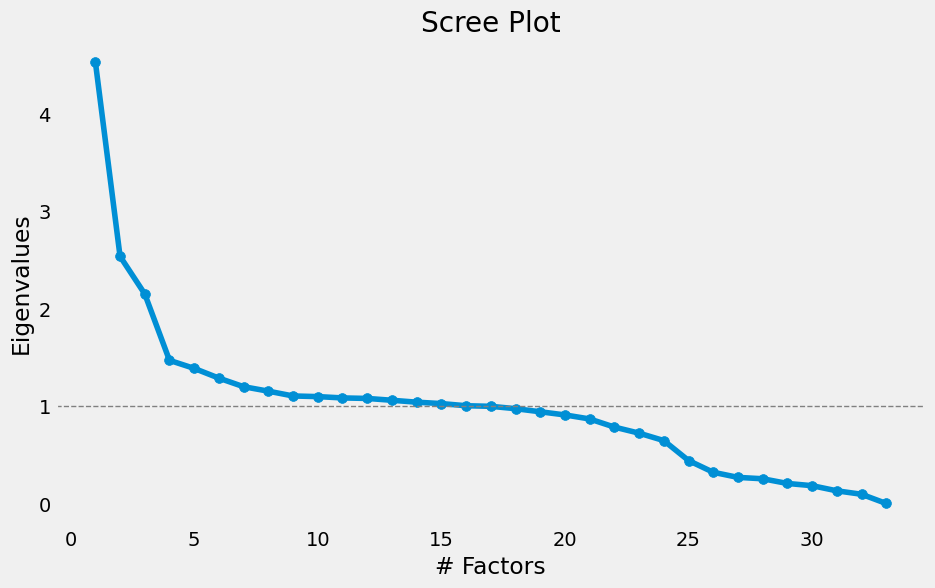

In [24]:
# Seuil 1
n_columns = len(X.columns)
scree_plot(eigenvalues, n_columns=n_columns)

In [18]:
number_of_factors = sum(eigenvalues > 1)
factor_model = train_factor_model(X, number_of_factors, rotation="promax")

<ipython-input-15-8b1479f7c88e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([""] + variables, fontsize=10)
<ipython-input-15-8b1479f7c88e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([""] + factors, rotation="vertical", fontsize=10)


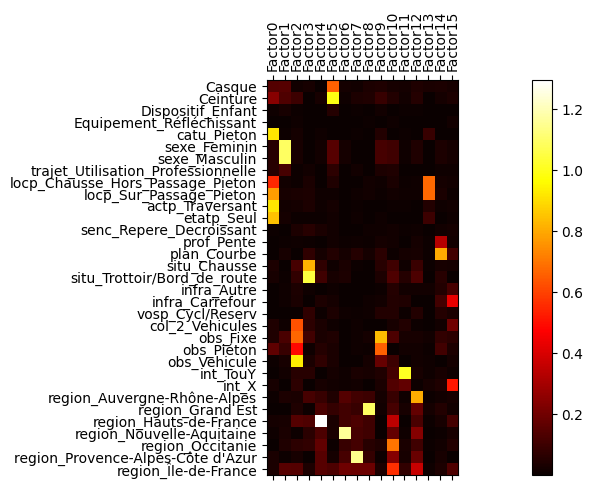

In [20]:
loadings = factor_model.loadings_
loadings_abs = np.abs(loadings)

columns = X.columns.tolist()
loadings_plot(loadings_abs, columns)

In [21]:
#regrouper les facteurs
n_factors = loadings.shape[1]
factors_list = ["Factor{}".format(index) for index in range(n_factors)]
factors = {}.fromkeys(factors_list, None)
for key in factors:
  factors[key] = []

argsmax = loadings_abs.argmax(axis=1)
for argmax, column in zip(argsmax, columns):
  factors[factors_list[argmax]].append(column)

In [27]:
factors

{'Factor0': ['catu_Pieton',
  'locp_Sur_Passage_Pieton',
  'actp_Traversant',
  'etatp_Seul'],
 'Factor1': ['sexe_Feminin',
  'sexe_Masculin',
  'trajet_Utilisation_Professionnelle'],
 'Factor2': ['col_2_Vehicules', 'obs_Vehicule'],
 'Factor3': ['senc_Repere_Decroissant',
  'situ_Chausse',
  'situ_Trottoir/Bord_de_route',
  'vosp_Cycl/Reserv'],
 'Factor4': ['region_Hauts-de-France'],
 'Factor5': ['Casque', 'Ceinture', 'Dispositif_Enfant'],
 'Factor6': ['region_Nouvelle-Aquitaine'],
 'Factor7': ["region_Provence-Alpes-Côte d'Azur"],
 'Factor8': ['region_Grand Est'],
 'Factor9': ['obs_Fixe', 'obs_Piéton'],
 'Factor10': ['region_Occitanie', 'region_Île-de-France'],
 'Factor11': ['int_TouY'],
 'Factor12': ['region_Auvergne-Rhône-Alpes'],
 'Factor13': ['locp_Chausse_Hors_Passage_Pieton'],
 'Factor14': ['prof_Pente', 'plan_Courbe'],
 'Factor15': ['Equipement_Réfléchissant',
  'infra_Autre',
  'infra_Carrefour',
  'int_X']}

In [22]:
X_latent = factor_model.transform(X)
y_multiclass = np.array(y).ravel()

In [23]:
def train(X, y, grid_params, seed):

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                      test_size=0.2,
                                                      random_state=seed,
                                                      stratify=y)

  # The models dict has same keys as grid_params
  # pointing to the grid search of each classifier
  models = {
      #"SGD": SGDClassifier(),
      "Logistic Regression": LogisticRegression()
      #"Random Forest": RandomForestClassifier(),
      #"AdaBoost": AdaBoostClassifier(),
      #"GradientBoost": GradientBoostingClassifier()
  }

  # store best estimators
  best_estimators = dict.fromkeys(models.keys())

  for model_name in models:
    base_clf = models[model_name]
    params = grid_params[model_name]

    print("[INFO] Performing Grid-Search CV ---- {}".format(model_name))
    model = GridSearchCV(base_clf, params, scoring='accuracy', cv=5, n_jobs=-1,
                         verbose=0)

    model.fit(X_train, y_train)
    best_estimators[model_name] = model.best_estimator_

  return best_estimators, X_test, y_test

In [24]:
def evaluate_multiclass(models, X_test, y_test):
  results = pd.DataFrame(columns=["Overall Accuracy"], index=models.keys())

  for model_name, model in models.items():
    n_samples = len(y_test)
    y_pred = model.predict(X_test)

    overall_accuracy = np.sum(y_pred == y_test) / n_samples
    results.loc[model_name, :] = overall_accuracy

  return results

In [25]:
def select_multiclass_model(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)

    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return models[best_model]

In [26]:
grid_params_multiclass = {
   # "SGD": {
   #     "penalty": ["l1", "l2", "elasticnet"],
   #     "alpha": np.linspace(1e-5, 1e-3, 5),
   #     "learning_rate": ["optimal", "invscaling", "adaptive"],
   #     "eta0": np.linspace(1e-4, 1e-1, 5)
   # },
   "Logistic Regression": {
        "penalty": ["l1", "l2"],
        "C": [1, 2, 4, 5],
        "solver": ["liblinear"]
    }
    #"Random Forest": {
    #    "criterion": ["gini", "entropy"],
    #    "max_depth": np.linspace(3, 12, 4, dtype=np.int64),
    #    "min_samples_split": np.linspace(0.1, 0.5, 6),
    #    "min_samples_leaf": np.linspace(0.1, 0.5, 6),
    #    "max_features":["log2","sqrt"]
    #}
    #"AdaBoost": {
     #   "base_estimator": [DecisionTreeClassifier(max_depth=1),
     #                      DecisionTreeClassifier(max_depth=2),
      #                     DecisionTreeClassifier(max_depth=3)],
      #  "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
      #  "n_estimators": np.linspace(20, 80, 4, dtype=np.int64),
   # }
    #"GradientBoost": {
    #    "loss":["deviance"],
    #    "learning_rate": [0.01, 0.025, 0.05, 0.075],
    #    "min_samples_split": np.linspace(0.1, 0.5, 5),
    #    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    #    "max_depth":[3, 5, 8],
    #    "max_features":["log2","sqrt"],
    #    "criterion": ["friedman_mse"],
    #   "subsample":[0.5, 0.618, 0.85],
    #    "n_estimators":[5, 10, 15]
   # }
}

# Entrainer le modelle

In [33]:
## Train and evaluate binary model with factor analysis (latent) variables
seed = 42
estimators_multiclass_latent, X_test_latent, y_test_multiclass = train(X_latent, y_multiclass,
                                                                       grid_params_multiclass, seed)

evaluate_multiclass(estimators_multiclass_latent, X_test_latent, y_test_multiclass)

[INFO] Performing Grid-Search CV ---- Logistic Regression


,Overall Accuracy
Logistic Regression,0.567065


In [9]:
def classification_repot(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    C = classification_report(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(C)

classifition = classification_repot(estimators_multiclass_latent, X_test_latent, y_test_multiclass)

NameError: ignored

In [10]:
X.shape

(2509660, 33)

In [ ]:
## Train and evaluate binary model with the original variables (without factor analysis)
seed = 42
estimatorsmulticlass, X_test, y_test_multiclass = train(X, y_multiclass,
                                                         grid_params_multiclass,
                                                         seed)

evaluate_multiclass(estimators_multiclass, X_test, y_test_multiclass)

[INFO] Performing Grid-Search CV ---- Logistic Regression


In [ ]:
def classification_repot(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    C = classification_report(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(C)

classifition = classification_repot(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
def confusion_m(models, X_test, y_test):
  best_overall_accuracy = -1
  best_model = ""
  n_samples = len(y_test)

  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    overall_accuracy = np.sum(y_pred == y_test) / n_samples

    if overall_accuracy > best_overall_accuracy:
      best_overall_accuracy = overall_accuracy
      best_model = model_name

  #print("{}\nOverall accuracy = {:.4f}".format(best_model, best_overall_accuracy))
  return print(cnf_matrix)

#cnf_matrix = confusion_m(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
cnf_matrix = confusion_m(estimators_multiclass, X_test, y_test_multiclass)

In [ ]:
#Evaluation
model=lr
y_pred=model.predict(X_test)

cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(model,'\n')
print(cm,'\n')
report = classification_report(y_test, y_pred)
print(report,'\n')

# Binaire classification - Analyse factorielle

In [ ]:
def evaluate_binary(models, X_test, y_test):

  results = pd.DataFrame(columns=["accuracy", "Precision", "Recall", "F1 Score"],
                         index=models.keys())

  for model_name, model in models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.loc[model_name, :] = accuracy, precision, recall, f1

  return results

In [ ]:
# choose best models based on accuracy
def select_binary_model(models, X_test, y_test):
  best_accuracy = -1
  best_model = ""
  for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_model = model_name

  print("{}\naccuracy = {:.4f}".format(best_model, best_accuracy))
  return models[best_model]

In [ ]:
grid_params_binary = {
    "SGD": {
        "penalty": ["l1", "l2", "elasticnet"],
        "alpha": np.linspace(1e-5, 1e-3, 5),
        "learning_rate": ["optimal", "invscaling", "adaptive"],
        "eta0": np.linspace(1e-4, 1e-1, 5)
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2"],
        "C": [1, 2, 4, 5],
        "solver": ["liblinear"]
    },
    "Random Forest": {
        "criterion": ["gini", "entropy"],
        "max_depth": np.linspace(3, 12, 4, dtype=np.int64),
        "min_samples_split": np.linspace(0.1, 0.5, 6),
        "min_samples_leaf": np.linspace(0.1, 0.5, 6),
        "max_features":["log2","sqrt"]
    },
    "AdaBoost": {
        "base_estimator": [DecisionTreeClassifier(max_depth=1),
                           DecisionTreeClassifier(max_depth=2),
                           DecisionTreeClassifier(max_depth=3)],
        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
        "n_estimators": np.linspace(20, 80, 4, dtype=np.int64),
    },
    "GradientBoost": {
        "loss":["deviance"],
        "learning_rate": [0.01, 0.025, 0.05, 0.075],
        "min_samples_split": np.linspace(0.1, 0.5, 5),
        "min_samples_leaf": np.linspace(0.1, 0.5, 5),
        "max_depth":[3, 5, 8],
        "max_features":["log2","sqrt"],
        "criterion": ["friedman_mse"],
        "subsample":[0.5, 0.618, 0.85],
        "n_estimators":[5, 10, 15]
    }
}

In [ ]:
# Train and evaluate binary model with factor analysis (latent) variables
estimators_binary_latent, X_test_latent, y_test_binary = train(X_latent,
                                                               y_binary,
                                                               grid_params_binary,
                                                               seed)

evaluate_binary(estimators_binary_latent, X_test_latent, y_test_binary)

In [ ]:
# Train and evaluate binary model with the original variables (without factor analysis)
estimators_binary, X_test, y_test_binary = train(X, y_binary,
                                                 grid_params_binary,
                                                 seed)

evaluate_binary(estimators_binary, X_test, y_test_binary)